<a href="https://colab.research.google.com/github/MilizCom/Data-mining/blob/main/Regresi_Logistik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Patients Data ( Used for Heart Disease Prediction ) (1).xlsx to Patients Data ( Used for Heart Disease Prediction ) (1).xlsx


In [ ]:
data = pd.read_excel(list(uploaded.keys())[0])

In [ ]:
data.head()

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,Alabama,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,0,1,...,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",0,0,0,1,"No, did not receive any tetanus shot in the pa...",0,1
1,2,Alabama,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received Tdap",0,0
2,3,Alabama,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",1,0,0,0,"Yes, received tetanus shot but not sure what type",0,0
3,4,Alabama,Male,Very good,Age 70 to 74,1.78,95.250000,30.129999,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received tetanus shot but not sure what type",0,0
4,5,Alabama,Female,Good,Age 50 to 54,1.68,78.019997,27.760000,0,0,...,Never used e-cigarettes in my entire life,1,"Black only, Non-Hispanic",0,0,1,0,"No, did not receive any tetanus shot in the pa...",0,0


In [ ]:
data['Sex'] = data['Sex'].map({'Female': 0, 'Male': 1})
data['GeneralHealth'] = data['GeneralHealth'].map({'Poor': 1, 'Fair': 2, 'Good': 3, 'Very good': 4, 'Excellent': 5})
data['HadDiabetes'] = data['HadDiabetes'].map({'Yes': 1, 'No': 0})

In [ ]:
data = data.dropna()

In [ ]:
data_100 = data.sample(n=100, random_state=42)

In [ ]:
X_100 = data_100[['HeightInMeters', 'WeightInKilograms']]

In [ ]:
y_100 = data_100['HadHeartAttack']

In [ ]:
X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(X_100, y_100, test_size=0.3, random_state=42)


In [ ]:
model_100 = LogisticRegression()
model_100.fit(X_train_100, y_train_100)

LogisticRegression()

In [ ]:
y_pred_100 = model_100.predict(X_test_100)
accuracy_100 = accuracy_score(y_test_100, y_pred_100)
print("Akurasi Perbandingan 1 (100 data, 2 variabel bebas):", accuracy_100)

Akurasi Perbandingan 1 (100 data, 2 variabel bebas): 0.9666666666666667


In [ ]:
data_150 = data.sample(n=150, random_state=42)

In [ ]:
X_150 = data_150[['HeightInMeters', 'WeightInKilograms', 'BMI']]

In [ ]:
y_150 = data_150['HadHeartAttack']

In [ ]:
X_train_150, X_test_150, y_train_150, y_test_150 = train_test_split(X_150, y_150, test_size=0.3, random_state=42)


In [ ]:
model_150 = LogisticRegression()
model_150.fit(X_train_150, y_train_150)

LogisticRegression()

In [ ]:
y_pred_150 = model_150.predict(X_test_150)
accuracy_150 = accuracy_score(y_test_150, y_pred_150)
print("Akurasi Perbandingan 2 (150 data, 3 variabel bebas):", accuracy_150)

Akurasi Perbandingan 2 (150 data, 3 variabel bebas): 0.9333333333333333


In [ ]:
if accuracy_150 > accuracy_100:
    print("Penambahan variabel bebas meningkatkan akurasi model.")
else:
    print("Penambahan variabel bebas tidak meningkatkan akurasi model.")

Penambahan variabel bebas tidak meningkatkan akurasi model.


Akurasi model: 1.0


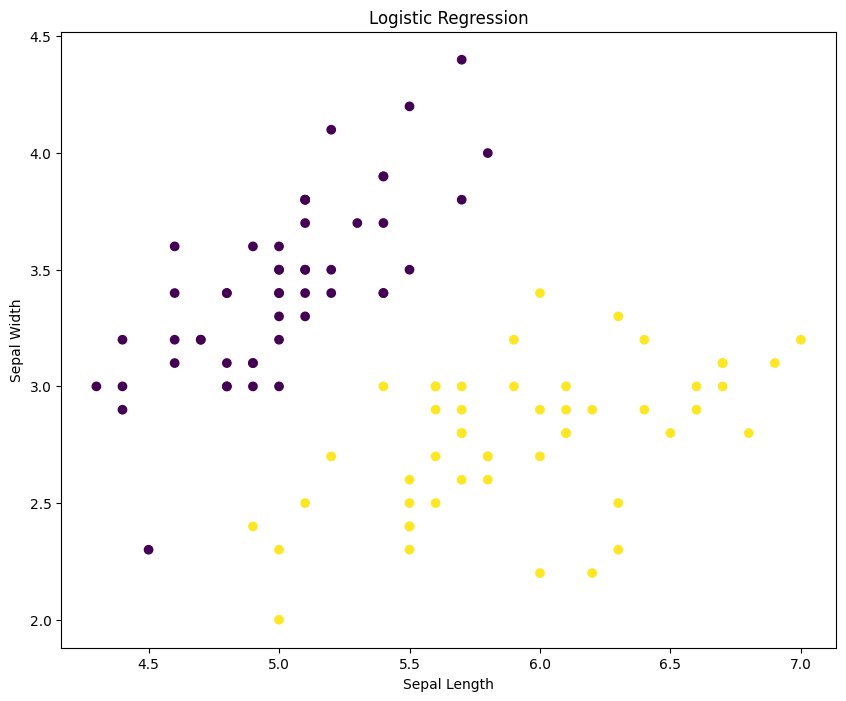

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
# Membaca dataset Iris dari scikit-learn
iris = load_iris()
# Memilih hanya 100 data pertama dan 2 variabel bebas
X = iris.data[:100, :2]
y = iris.target[:100]
# Membuat model regresi logistik
model = LogisticRegression()
# Melatih model pada dataset
model.fit(X, y)
# Memprediksi kelas pada dataset yang sama
y_pred = model.predict(X)
# Menampilkan hasil akurasi model
print("Akurasi model:", model.score (X, y))
# Membuat scatter plot untuk visualisasi hasil prediksi
plt.figure(figsize=(10, 8))
plt.scatter (X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Logistic Regression')
plt.show()